In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from matplotlib import colors
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,3.5), 'figure.autolayout': True})
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
data_path = os.path.join(os.path.pardir, 'data', 'daint_utilization')


In [2]:
dfs = []
for i in range(36):
    dfs.append(pd.read_csv(os.path.join(data_path, f'out_{i}.csv')))
df = pd.concat(dfs)

from dateutil.parser import parse
df['date'] = df.date.apply(parse)
df['idle_cpus'] *= 100
df['partially_idle_cpus'] *= 100
df['partially_free_mem'] *= 100
df['free_mem'] *= 100
df['total_free_mem'] = df['partially_free_mem'] + df['free_mem']
df['total_idle_cpus'] = df['idle_cpus'] #+ df['partially_idle_cpus']
df.sort_values(by=['date'],inplace=True)
df.reset_index(inplace=True)

/tmp/ipykernel_763875/1024406679.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.figure.savefig(os.path.join('plots', 'utilization', 'cpu_utilization_daint.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


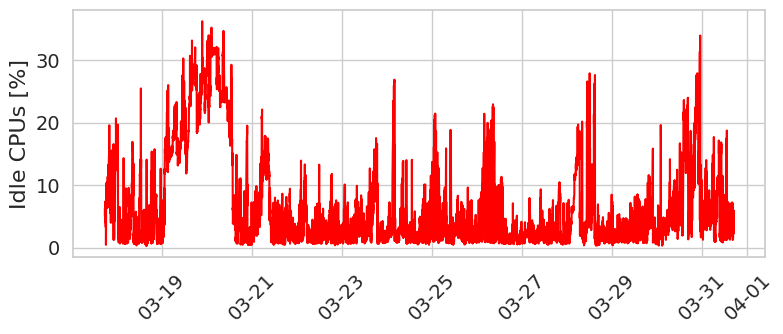

In [3]:

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot(x='date', y='idle_cpus', color='red', data=df, ax=ax1)

ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)


ax1.set_ylabel('Idle CPUs [%]',fontsize=16)
ax1.set_xlabel('')#'Time',fontsize=16)
#ax2.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint utilization rates: idle CPU cores.\n Data from 31.03 to 7.04 in 2021.',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.',fontsize=16)
# Major ticks every 6 months.
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
#fmt_month = mdates.MinuteLocator()
#ax.xaxis.set_minor_locator(fmt_month)
#xfmt = md.DateFormatter('%d-%m-%Y %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
#xformatter = md.DateFormatter('%d-%m-%Y %H:%M:%S')

## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)


plot.figure.savefig(os.path.join('plots', 'utilization', 'cpu_utilization_daint.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)

/tmp/ipykernel_763875/4083887494.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.figure.savefig(os.path.join('plots', 'utilization',  'mem_utilization_daint.pdf'), bbox_inches='tight',pad_inches = 0, transparent=False)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


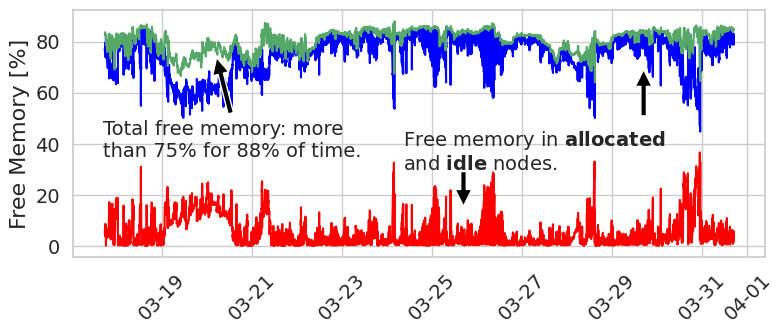

In [4]:
sns.set(rc={'figure.figsize':(8,3.5), 'figure.autolayout': True})
sns.set_style("whitegrid")


fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot(x='date', y='free_mem', color='red', data=df, ax=ax1)
sns.lineplot(x='date', y='partially_free_mem', color='blue', data=df, ax=ax1)
sns.lineplot(x='date', y='total_free_mem', color='g', data=df, ax=ax1)

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
#ax1.set_ylim([0,100])

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)
#print(dt.datetime(2022, 3, 19))
#print(df.dtypes)
#plt.annotate('Idle nodes.', xy=(np.datetime64('2022-03-30 16:44:16'), 20),  #xycoords='data',
#            xytext=(np.datetime64('2022-03-27 22:44:16'), 40), fontsize=14,
    #textcoords='axes fraction',
#            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
#    #        , verticalalignment='top',
#)
#plt.annotate('Allocated nodes.', xy=(np.datetime64('2022-03-25 16:44:16'), 70),  #xycoords='data',
#            xytext=(np.datetime64('2022-03-24 12:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
#            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
#)
plot.annotate('Total free memory: more\nthan 75% for 88% of time.', xy=(np.datetime64('2022-03-20 04:44:16'), 75),  #xycoords='data',
            xytext=(np.datetime64('2022-03-17 16:44:16'), 35), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate(r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-29 16:44:16'), 70),  #xycoords='data',
            xytext=(np.datetime64('2022-03-24 08:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-29 16:44:16'), 70),  #xycoords='data',
            xytext=(np.datetime64('2022-03-29 16:44:16'), 50), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)
plot.annotate("",
             #r'Free memory in $\bf{allocated}$'+'\n'+r'and $\bf{idle}$ nodes.',
             xy=(np.datetime64('2022-03-25 16:44:16'), 15),  #xycoords='data',
            xytext=(np.datetime64('2022-03-25 16:44:16'), 30), fontsize=14,
    #textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05)#,horizontalalignment='right'
    #        , verticalalignment='top',
)

plot.figure.savefig(os.path.join('plots', 'utilization',  'mem_utilization_daint.pdf'), bbox_inches='tight',pad_inches = 0, transparent=False)

In [5]:
subset = df.loc[df['total_free_mem'] > 75]
print(df['total_free_mem'].min())
print(df['total_free_mem'].quantile(.75))
print(subset.shape[0], df.shape[0], subset.shape[0] /df.shape[0])

64.09011056547783
83.7358926042681
10261 11624 0.8827426015141088


In [6]:

print(df['total_idle_cpus'].min())
print(df['total_idle_cpus'].max())
print(df['total_idle_cpus'].mean())
print(df['total_idle_cpus'].median())
print(df['total_idle_cpus'].quantile(.95))
for i in [5,10,15,20,25]:
    subset = df.loc[df['total_idle_cpus'] > i]
    print(i, subset.shape[0], df.shape[0], subset.shape[0] /df.shape[0])

0.23317112733171
36.27022598484331
6.6460580977028485
3.45525429964254
24.170597493364703
5 4369 11624 0.3758602890571232
10 2501 11624 0.21515829318651067
15 1686 11624 0.1450447350309704
20 1011 11624 0.08697522367515485
25 517 11624 0.0444769442532691


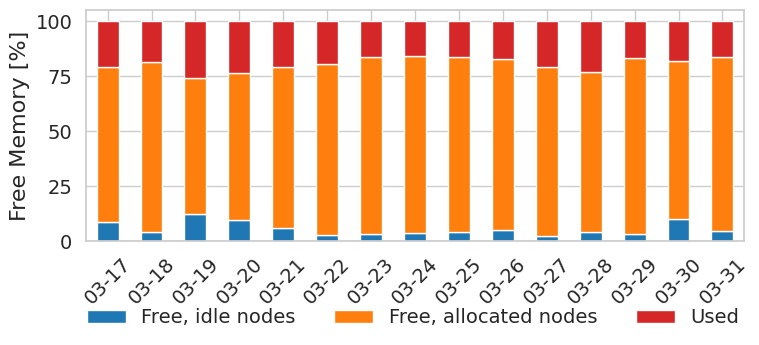

In [7]:
import datetime

sns.set(rc={'figure.figsize':(8.5,3), 'figure.autolayout': False})
sns.set_style("whitegrid")

aggregated_data_daily = df.resample('D', on='date').mean().reset_index()

aggregated_data_daily['date'] = aggregated_data_daily.date.dt.strftime('%m-%d')
aggregated_data_daily['allocated_mem'] = 100 - aggregated_data_daily['total_free_mem']
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'free_mem', color='red', data=df, ax=ax1)
#sns.lineplot('date', 'partially_free_mem', color='blue', data=df, ax=ax1)
#sns.lineplot('date', 'total_free_mem', color='g', data=df, ax=ax1)

colormap=list(map(colors.to_rgba, ['tab:blue', 'tab:orange', 'tab:red']))
aggregated_data_daily.plot(
    kind='bar',
    x='date',
    y=['free_mem', 'partially_free_mem', 'allocated_mem'],
    color=colormap,
    stacked=True,
    ax=ax1
)
plot = fig

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
#ax1.set_ylim([0,100])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles,
    ['Free, idle nodes', 'Free, allocated nodes', 'Used'],
    fontsize=14,
    ncol=3,
    bbox_to_anchor=(-0.025, -0.45),
    loc="lower left",
    frameon=False
)

#xfmt = md.DateFormatter('%m-%d')
#ax1.xaxis.set_major_formatter(xfmt)

plot.figure.savefig(
    os.path.join('plots',  'utilization', 'mem_utilization_daint_barplot.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

# Node Idleness Statistics

In [8]:
utilization_stats = pd.read_csv(os.path.join(data_path, f'utilization_stats.csv'))
# drop the 'already idle'
utilization_stats.drop(utilization_stats[utilization_stats.prev_query_len <= 0].index, inplace=True, axis=0)
# drop the 'still idle' - we can't accurately estimate them
utilization_stats.drop(utilization_stats[utilization_stats.next_query_len <= 0].index, inplace=True, axis=0)

for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats.loc[utilization_stats['duration_idle'] < time].shape[0] / utilization_stats.shape[0])

utilization_stats2 = utilization_stats.copy(deep=True)

utilization_stats['type'] = 'min'

utilization_stats2['duration_idle'] += utilization_stats2.prev_query_len + utilization_stats2.next_query_len
utilization_stats2['type'] = 'max'
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats2.loc[utilization_stats2['duration_idle'] < time].shape[0] / utilization_stats2.shape[0])

utilization_stats = pd.concat([utilization_stats, utilization_stats2], axis=0)


Idle time 300, fraction  0.621018947117746
Idle time 600, fraction  0.8005879113518984
Idle time 1200, fraction  0.9036465387649396
Idle time 1800, fraction  0.9414053313885127
Idle time 6000, fraction  0.9882968431392978
Idle time 300, fraction  0.3039784482117076
Idle time 600, fraction  0.6983717088127167
Idle time 1200, fraction  0.8822227514251268
Idle time 1800, fraction  0.9322964263920104
Idle time 6000, fraction  0.9879351660291426


1000.0
0.9368508788902615
0.7494798100823076


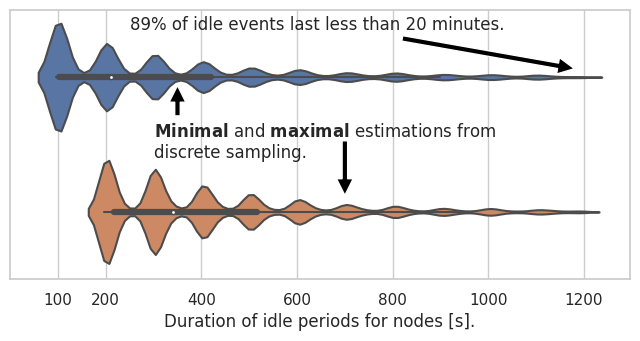

In [9]:

#print(utilization_stats)
#df = pd.concat(dfs)sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,3.5))
sns.set_style("whitegrid")
ax = fig.gca()
#ax2 = ax1.twinx()

print(1e3)
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1800].shape[0] / utilization_stats.shape[0])
print(utilization_stats.loc[utilization_stats['duration_idle'] < 600].shape[0] / utilization_stats.shape[0])

sns.violinplot(
    data=utilization_stats.loc[
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    ],
    x='duration_idle',
    y='type',
    ax=ax
)
#ax1.set_yticks()
#sns.violinplot(
#    data=utilization_stats.loc[
#        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1800)
#    ],
#    x='duration_idle',
#    ax=ax1
#)
#ax1.set_xscale('log')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Duration of idle periods for nodes [s].')

ax.set_xticks([100, 200, 400, 600, 800, 1000, 1200])
#ax.set_yticks(['Min', 'Max'])

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax1)

# ~100 seconds is sampling interval
#80% and 70% nodes are idle for less than 10 minutes
#We present 93.5% percent of data - nodes idle for less than 30 minutes (1800 seconds).

ax.annotate(
    r'$\bf{Minimal}$ and $\bf{maximal}$ estimations from' + '\ndiscrete sampling.',
    xy=(300, 1),
    xytext=(300, 0.6),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(350, 0.05),
    xytext=(350, 0.3),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)
ax.annotate(
    '',
    xy=(700, 0.9),
    xytext=(700, 0.45),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)

ax.annotate(
    '89% of idle events last less than 20 minutes.',
    xy=(250, -0.35),
    xytext=(250, -0.35),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(1200, -0.05),
    xytext=(800, -0.3),
    fontsize=12,
    arrowprops=dict(facecolor='black', shrink=0.05)
)


ax.figure.savefig(
    os.path.join('plots',  'utilization', 'nodes_idle_statistics.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

# Poster plots

1000.0
0.9368508788902615
0.8929346450950333


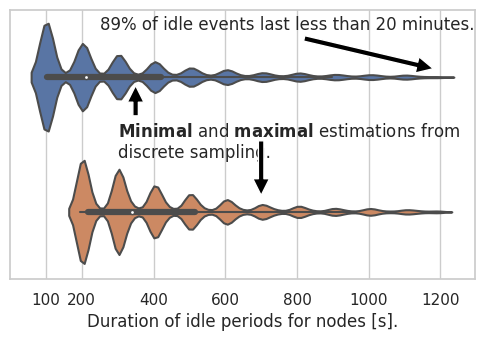

In [10]:

#print(utilization_stats)
#df = pd.concat(dfs)sns.set_style("whitegrid")
fig = plt.figure(figsize=(6, 3.5))
ax = fig.gca()
#ax2 = ax1.twinx()

print(1e3)
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1800].shape[0] / utilization_stats.shape[0])
print(utilization_stats.loc[utilization_stats['duration_idle'] < 1200].shape[0] / utilization_stats.shape[0])

sns.violinplot(
    data=utilization_stats.loc[
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    ],
    x='duration_idle',
    y='type',
    ax=ax
)
#ax1.set_yticks()
#sns.violinplot(
#    data=utilization_stats.loc[
#        (utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1800)
#    ],
#    x='duration_idle',
#    ax=ax1
#)
#ax1.set_xscale('log')
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Duration of idle periods for nodes [s].')

ax.set_xticks([100, 200, 400, 600, 800, 1000, 1200])
#ax.set_yticks(['Min', 'Max'])

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'idle_cpus', color='red', data=df, ax=ax1)

# ~100 seconds is sampling interval
#80% and 70% nodes are idle for less than 10 minutes
#We present 93.5% percent of data - nodes idle for less than 30 minutes (1800 seconds).

ax.annotate(
    r'$\bf{Minimal}$ and $\bf{maximal}$ estimations from' + '\ndiscrete sampling.',
    xy=(300, 1),
    xytext=(300, 0.6),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(350, 0.05),
    xytext=(350, 0.3),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)
ax.annotate(
    '',
    xy=(700, 0.9),
    xytext=(700, 0.45),
    fontsize=12,
    #textcoords='axes fraction',
    arrowprops=dict(facecolor='black', shrink=0.05)
    #,horizontalalignment='right'
)

ax.annotate(
    '89% of idle events last less than 20 minutes.',
    xy=(250, -0.35),
    xytext=(250, -0.35),
    fontsize=12,
)
ax.annotate(
    '',
    xy=(1200, -0.05),
    xytext=(800, -0.3),
    fontsize=12,
    arrowprops=dict(facecolor='black', shrink=0.05)
)

ax.figure.savefig(
    os.path.join('plots',  'utilization', 'nodes_idle_statistics_poster.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

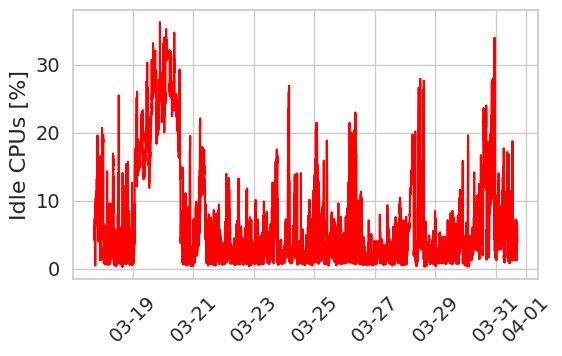

In [12]:

fig = plt.figure(figsize=(6, 3.5))
ax = fig.gca()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

plot = sns.lineplot(x='date', y='idle_cpus', color='red', data=df, ax=ax)

ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)


ax.set_ylabel('Idle CPUs [%]',fontsize=16)
ax.set_xlabel('')#'Time',fontsize=16)
#ax2.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint utilization rates: idle CPU cores.\n Data from 31.03 to 7.04 in 2021.',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.',fontsize=16)
# Major ticks every 6 months.
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
#fmt_month = mdates.MinuteLocator()
#ax.xaxis.set_minor_locator(fmt_month)
#xfmt = md.DateFormatter('%d-%m-%Y %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
#xformatter = md.DateFormatter('%d-%m-%Y %H:%M:%S')

## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)


plot.figure.savefig(os.path.join('plots',  'utilization', 'cpu_utilization_daint_poster.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)

## Smaller plots

       index  Unnamed: 0                date  idle_cpus  partially_idle_cpus  \
0        248         248 2022-03-17 17:37:06   5.033126             5.033126   
1        147         147 2022-03-17 17:38:59   6.250000             6.250000   
2        213         213 2022-03-17 17:43:06   6.088368             6.088368   
3        314         314 2022-03-17 17:44:54   6.291200             6.291200   
4        110         110 2022-03-17 17:46:36   4.303438             4.303438   
...      ...         ...                 ...        ...                  ...   
11619    108         108 2022-03-31 16:44:16   5.368584             5.368584   
11620    285         285 2022-03-31 16:46:15   5.934007             5.934007   
11621    174         174 2022-03-31 16:48:13   4.727813             4.727813   
11622    200         200 2022-03-31 16:50:13   3.934404             3.934404   
11623    116         116 2022-03-31 16:52:28   4.269754             4.269754   

       partially_free_mem  free_mem  al

/tmp/ipykernel_763875/3836612531.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.figure.savefig(os.path.join('plots',  'utilization', 'cpu_utilization_daint_small2.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


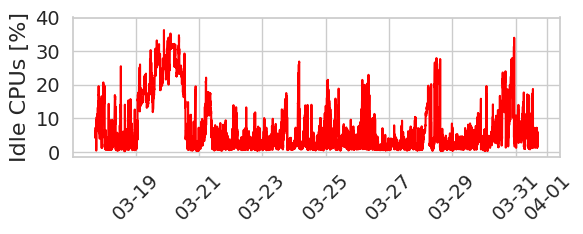

In [13]:
sns.set(rc={'figure.figsize':(6,2.5), 'figure.autolayout': True})
#sns.set(rc={'figure.figsize':(6,2), 'figure.autolayout': True})

sns.set_style("whitegrid")
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)
print(df)
plot = sns.lineplot(x='date', y='idle_cpus', color='red', data=df, ax=ax1)

ax1.tick_params(axis='x', rotation=45, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)


ax1.set_ylabel('Idle CPUs [%]',fontsize=16)
ax1.set_xlabel('')#'Time',fontsize=16)
#ax2.set_ylabel('Free Memory [%]',fontsize=16)
#plt.set_title('Piz Daint utilization rates: idle CPU cores.\n Data from 31.03 to 7.04 in 2021.',fontsize=16)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.',fontsize=16)
# Major ticks every 6 months.
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
#fmt_month = mdates.MinuteLocator()
#ax.xaxis.set_minor_locator(fmt_month)
#xfmt = md.DateFormatter('%d-%m-%Y %H:%M:%S')
#ax.xaxis.set_major_formatter(xfmt)

# Text in the x axis will be displayed in 'YYYY-mm' format.
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
#xformatter = md.DateFormatter('%d-%m-%Y %H:%M:%S')

## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)
ax1.yaxis.set_ticks([0,10,20,30,40])

plot.figure.savefig(os.path.join('plots',  'utilization', 'cpu_utilization_daint_small2.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)

/work/serverless/2022/software_disaggregation/new-artifact-repo/analysis/plots/mem_utilization_daint_barplot_small.pdf


/tmp/ipykernel_763875/1256885969.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax1.figure.savefig(
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


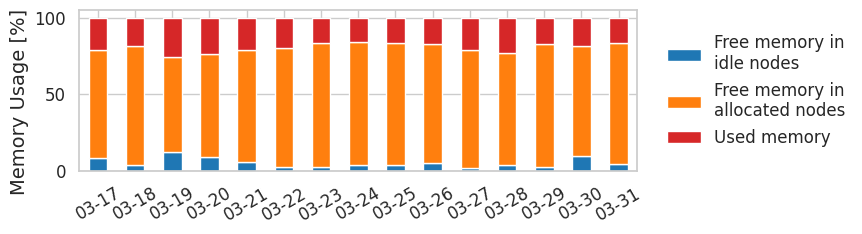

In [14]:
import datetime


sns.set(rc={'figure.figsize':(9,2.5), 'figure.autolayout': True})
sns.set_style("whitegrid")

aggregated_data_daily = df.resample('D', on='date').mean().reset_index()

aggregated_data_daily['date'] = aggregated_data_daily.date.dt.strftime('%m-%d')
aggregated_data_daily['allocated_mem'] = 100 - aggregated_data_daily['total_free_mem']
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'free_mem', color='red', data=df, ax=ax1)
#sns.lineplot('date', 'partially_free_mem', color='blue', data=df, ax=ax1)
#sns.lineplot('date', 'total_free_mem', color='g', data=df, ax=ax1)

colormap=list(map(colors.to_rgba, ['tab:blue', 'tab:orange', 'tab:red']))
aggregated_data_daily.plot(
    kind='bar',
    x='date',
    y=['free_mem', 'partially_free_mem', 'allocated_mem'],
    color=colormap,
    stacked=True,
    ax=ax1
)
plot = fig

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Memory Usage [%]',fontsize=14, loc='bottom')
ax1.yaxis.set_label_coords(-0.09,-0.15)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=30, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_ticks([0,50,100])
#ax1.set_ylim([0,100])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles,
    ['Free memory in\nidle nodes', 'Free memory in\nallocated nodes', 'Used memory'],
    fontsize=12,
    ncol=1,
    bbox_to_anchor=(1.4, 0.5),
    loc="center right",
    frameon=False
)

#xfmt = md.DateFormatter('%m-%d')
#ax1.xaxis.set_major_formatter(xfmt)
print(os.path.realpath(os.path.join('plots', 'mem_utilization_daint_barplot_small.pdf')))
ax1.figure.savefig(
    os.path.join('plots',  'utilization', 'mem_utilization_daint_barplot_small.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

In [15]:


utilization_stats = pd.read_csv(os.path.join(data_path, f'utilization_stats.csv'))
# drop the 'already idle'
utilization_stats.drop(utilization_stats[utilization_stats.prev_query_len <= 0].index, inplace=True, axis=0)
# drop the 'still idle' - we can't accurately estimate them
utilization_stats.drop(utilization_stats[utilization_stats.next_query_len <= 0].index, inplace=True, axis=0)

for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats.loc[utilization_stats['duration_idle'] < time].shape[0] / utilization_stats.shape[0])

utilization_stats2 = utilization_stats.copy(deep=True)

utilization_stats['type'] = 'min'

utilization_stats2['duration_idle'] += utilization_stats2.prev_query_len + utilization_stats2.next_query_len
utilization_stats2['type'] = 'max'
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats2.loc[utilization_stats2['duration_idle'] < time].shape[0] / utilization_stats2.shape[0])

utilization_stats = pd.concat([utilization_stats, utilization_stats2], axis=0)


Idle time 300, fraction  0.621018947117746
Idle time 600, fraction  0.8005879113518984
Idle time 1200, fraction  0.9036465387649396
Idle time 1800, fraction  0.9414053313885127
Idle time 6000, fraction  0.9882968431392978
Idle time 300, fraction  0.3039784482117076
Idle time 600, fraction  0.6983717088127167
Idle time 1200, fraction  0.8822227514251268
Idle time 1800, fraction  0.9322964263920104
Idle time 6000, fraction  0.9879351660291426


/tmp/ipykernel_763875/1169520409.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


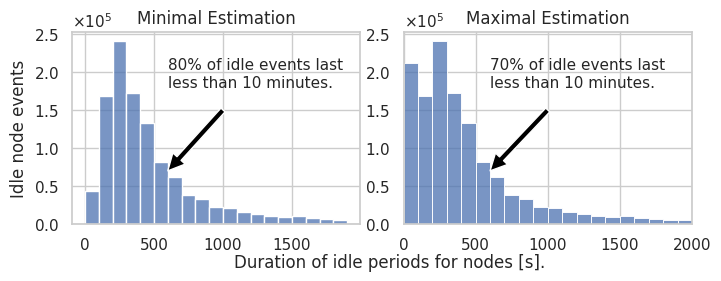

In [16]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2.5))
#fig, (ax1, ax2) = plt.figure(figsize=(8,2.5))

sns.set(rc={'figure.figsize':(8,2.5), 'figure.autolayout': True})

fig=plt.figure()
sns.set_style("whitegrid")
gs = matplotlib.gridspec.GridSpec(1,2)
gs.update(wspace=0.15,hspace=0)
ax1=plt.subplot(gs[0])
ax2=plt.subplot(gs[1])
#fig.subplots_adjust(wspace=0, hspace=0)
    
sns.histplot(
    data=utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0)
    ][['duration_idle']],
    bins=[x*100 for x in range(20)],#[0,200, 400,600,800,1000],
    #data=utilization_stats.loc[
    #    #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    #    (utilization_stats['duration_idle'] > 0)
    #],#[['duration_idle']],
    x='duration_idle',
    #bins=10,
    #binwidth=120,
    #y='type',
    ax=ax1
)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
#ax1.yaxis.major.formatter._useMathText = True
#ax1.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
ax1.set_title('Minimal Estimation')
ax2.set_title('Maximal Estimation')

sns.histplot(
    data=utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats2['duration_idle'] > 0)
    ][['duration_idle']],
    bins=[x*100 for x in range(30)],#[0,200, 400,600,800,1000],
    #data=utilization_stats.loc[
    #    #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
    #    (utilization_stats['duration_idle'] > 0)
    #],#[['duration_idle']],
    x='duration_idle',
    #bins=10,
    #binwidth=120,
    #y='type',
    ax=ax2
)
ax2.set_xlim([0, 2000])
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

ax1.set_ylabel('Idle node events')
ax1.set_xlabel('Duration of idle periods for nodes [s].')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax1.xaxis.set_label_coords(1.1, -.15)

ax1.annotate(
    '80% of idle events last\nless than 10 minutes.',
    xy=(600, 0.3*10**5),
    xytext=(600, 1.8*10**5),
    fontsize=11,
)

ax1.annotate(
    '',
    xy=(600, 0.7*10**5),
    xytext=(1000, 1.5*10**5),
    fontsize=12,
    arrowprops=dict(facecolor='black')#, shrink=0.05)
)


ax2.annotate(
    '70% of idle events last\nless than 10 minutes.',
    xy=(600, 0.3*10**5),
    xytext=(600, 1.8*10**5),
    fontsize=11,
)

ax2.annotate(
    '',
    xy=(600, 0.7*10**5),
    xytext=(1000, 1.5*10**5),
    fontsize=12,
    arrowprops=dict(facecolor='black')#, shrink=0.05)
)

#plt.subplots_adjust(wspace=0.0, hspace=0, right=0)
#fig.subplots_adjust(wspace=0.0, hspace=0)
#fig.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout()
fig.savefig(
    os.path.join('plots',  'utilization', 'nodes_idle_statistics_small.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

## Smaller versions of plots

In [18]:


utilization_stats = pd.read_csv(os.path.join(data_path, f'utilization_stats.csv'))
# drop the 'already idle'
utilization_stats.drop(utilization_stats[utilization_stats.prev_query_len <= 0].index, inplace=True, axis=0)
# drop the 'still idle' - we can't accurately estimate them
utilization_stats.drop(utilization_stats[utilization_stats.next_query_len <= 0].index, inplace=True, axis=0)

for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats.loc[utilization_stats['duration_idle'] < time].shape[0] / utilization_stats.shape[0])

utilization_stats2 = utilization_stats.copy(deep=True)

utilization_stats['type'] = 'min'

utilization_stats2['duration_idle'] += utilization_stats2.prev_query_len + utilization_stats2.next_query_len
utilization_stats2['type'] = 'max'
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats2.loc[utilization_stats2['duration_idle'] < time].shape[0] / utilization_stats2.shape[0])

utilization_stats = pd.concat([utilization_stats, utilization_stats2], axis=0)


Idle time 300, fraction  0.621018947117746
Idle time 600, fraction  0.8005879113518984
Idle time 1200, fraction  0.9036465387649396
Idle time 1800, fraction  0.9414053313885127
Idle time 6000, fraction  0.9882968431392978
Idle time 300, fraction  0.3039784482117076
Idle time 600, fraction  0.6983717088127167
Idle time 1200, fraction  0.8822227514251268
Idle time 1800, fraction  0.9322964263920104
Idle time 6000, fraction  0.9879351660291426


/tmp/ipykernel_763875/1935481143.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.figure.savefig(os.path.join('plots',  'utilization', 'cpu_utilization_daint_smaller.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


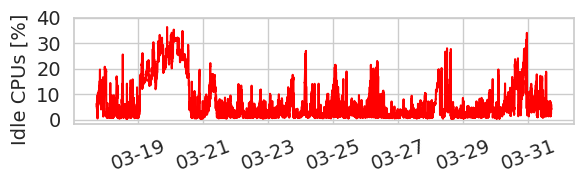

In [19]:
sns.set(rc={'figure.figsize':(6,2), 'figure.autolayout': True})
#sns.set(rc={'figure.figsize':(6,2), 'figure.autolayout': True})

sns.set_style("whitegrid")
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)
plot = sns.lineplot(x='date', y='idle_cpus', color='red', data=df, ax=ax1)

ax1.tick_params(axis='x', rotation=20, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_ylabel('Idle CPUs [%]',fontsize=14,loc='bottom')
ax1.set_xlabel('')#'Time',fontsize=16)
#fmt_half_year = mdates.HourLocator(interval=1)
#ax.xaxis.set_major_locator(fmt_half_year)
ax1.yaxis.set_label_coords(-0.09,-0.2)


## Set xtick labels to appear every 240 minutes

xfmt = md.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)
locs, labels = plt.xticks()
plt.xticks(ticks=locs[:-1])
ax1.yaxis.set_ticks([0,10,20,30,40])

plot.figure.savefig(os.path.join('plots',  'utilization', 'cpu_utilization_daint_smaller.pdf'),bbox_inches='tight',pad_inches = 0, transparent=False)

/work/serverless/2022/software_disaggregation/new-artifact-repo/analysis/plots/mem_utilization_daint_barplot_small.pdf


/tmp/ipykernel_763875/2910017811.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ax1.figure.savefig(
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


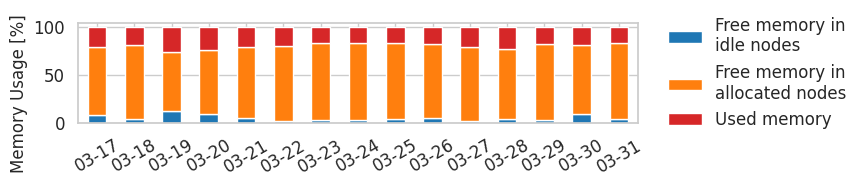

In [20]:
import datetime


sns.set(rc={'figure.figsize':(9,2), 'figure.autolayout': True})
sns.set_style("whitegrid")

aggregated_data_daily = df.resample('D', on='date').mean().reset_index()

aggregated_data_daily['date'] = aggregated_data_daily.date.dt.strftime('%m-%d')
aggregated_data_daily['allocated_mem'] = 100 - aggregated_data_daily['total_free_mem']
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

#xlocator = md.MinuteLocator(interval = 1)
#ax1.xaxis.set_major_locator(xlocator)

#plot = sns.lineplot('date', 'free_mem', color='red', data=df, ax=ax1)
#sns.lineplot('date', 'partially_free_mem', color='blue', data=df, ax=ax1)
#sns.lineplot('date', 'total_free_mem', color='g', data=df, ax=ax1)

colormap=list(map(colors.to_rgba, ['tab:blue', 'tab:orange', 'tab:red']))
aggregated_data_daily.plot(
    kind='bar',
    x='date',
    y=['free_mem', 'partially_free_mem', 'allocated_mem'],
    color=colormap,
    stacked=True,
    ax=ax1
)
plot = fig

ax1.set_xlabel('')#'Time',fontsize=16)
ax1.set_ylabel('Memory Usage [%]',fontsize=12, loc='bottom')
ax1.yaxis.set_label_coords(-0.09,-0.5)
#plt.set_title('Piz Daint, data from 31.03 to 7.04 in 2021.', fontsize=16)
ax1.tick_params(axis='x', rotation=30, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_ticks([0,50,100])
#ax1.set_ylim([0,100])

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles,
    ['Free memory in\nidle nodes', 'Free memory in\nallocated nodes', 'Used memory'],
    fontsize=12,
    ncol=1,
    bbox_to_anchor=(1.4, 0.5),
    loc="center right",
    frameon=False
)

#xfmt = md.DateFormatter('%m-%d')
#ax1.xaxis.set_major_formatter(xfmt)
print(os.path.realpath(os.path.join('plots', 'mem_utilization_daint_barplot_small.pdf')))
ax1.figure.savefig(
    os.path.join('plots',  'utilization', 'mem_utilization_daint_barplot_smaller.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

/tmp/ipykernel_763875/480542347.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/mcopik/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


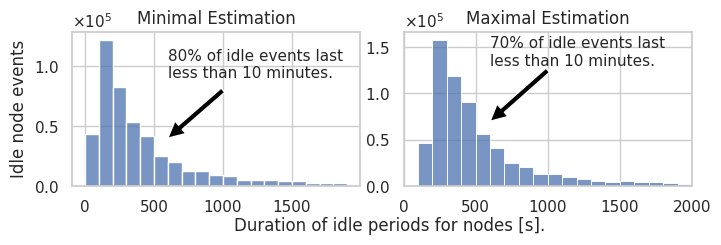

In [21]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2.5))
#fig, (ax1, ax2) = plt.figure(figsize=(8,2.5))
import matplotlib

sns.set(rc={'figure.figsize':(8,2), 'figure.autolayout': True})

fig=plt.figure()
sns.set_style("whitegrid")
gs = matplotlib.gridspec.GridSpec(1,2)
gs.update(wspace=0.15,hspace=0)
ax1=plt.subplot(gs[0])
ax2=plt.subplot(gs[1])
#fig.subplots_adjust(wspace=0, hspace=0)
    
sns.histplot(
    data=utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'min')
    ][['duration_idle']],
    bins=[x*100 for x in range(20)],#[0,200, 400,600,800,1000],
    x='duration_idle',
    ax=ax1
)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
#ax1.yaxis.major.formatter._useMathText = True
#ax1.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
ax1.set_title('Minimal Estimation')
ax2.set_title('Maximal Estimation')

sns.histplot(
    data=utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'max')
    ][['duration_idle']],
    bins=[x*100 for x in range(30)],#[0,200, 400,600,800,1000],
    x='duration_idle',
    ax=ax2
)
ax2.set_xlim([0, 2000])
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

ax1.set_ylabel('Idle node events')
ax1.set_xlabel('Duration of idle periods for nodes [s].')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax1.xaxis.set_label_coords(1.1, -.2)

ax1.annotate(
    '80% of idle events last\nless than 10 minutes.',
    xy=(600, 0.3*10**5),
    xytext=(600, 0.9*10**5),
    fontsize=11,
)
ax1.annotate(
    '',
    xy=(600, 0.4*10**5),
    xytext=(1000, 0.8*10**5),
    fontsize=12,
    arrowprops=dict(facecolor='black')#, shrink=0.05)
)
ax2.annotate(
    '70% of idle events last\nless than 10 minutes.',
    xy=(600, 0.3*10**5),
    xytext=(600, 1.3*10**5),
    fontsize=11,
)
ax2.annotate(
    '',
    xy=(600, 0.7*10**5),
    xytext=(1000, 1.25*10**5),
    fontsize=12,
    arrowprops=dict(facecolor='black')#, shrink=0.05)
)

fig.savefig(
    os.path.join('plots',  'utilization', 'nodes_idle_statistics_smaller.pdf'),
    bbox_inches='tight',
    pad_inches = 0,
    transparent=False
)

## Utilization Stats

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
from matplotlib import colors
from matplotlib import ticker
from scipy import stats

sns.set(rc={'figure.figsize':(8,3.5), 'figure.autolayout': True})
sns.set_style("whitegrid")
data_path = os.path.join(os.path.pardir, 'data', 'daint_utilization')


utilization_stats = pd.read_csv(os.path.join(data_path, f'utilization_stats.csv'))
# drop the 'already idle'
utilization_stats.drop(utilization_stats[utilization_stats.prev_query_len <= 0].index, inplace=True, axis=0)
# drop the 'still idle' - we can't accurately estimate them
utilization_stats.drop(utilization_stats[utilization_stats.next_query_len <= 0].index, inplace=True, axis=0)

for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats.loc[utilization_stats['duration_idle'] < time].shape[0] / utilization_stats.shape[0])

utilization_stats2 = utilization_stats.copy(deep=True)

utilization_stats['type'] = 'min'

utilization_stats2['duration_idle'] += utilization_stats2.prev_query_len + utilization_stats2.next_query_len
utilization_stats2['type'] = 'max'
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', utilization_stats2.loc[utilization_stats2['duration_idle'] < time].shape[0] / utilization_stats2.shape[0])

utilization_stats = pd.concat([utilization_stats, utilization_stats2], axis=0)


Idle time 300, fraction  0.621018947117746
Idle time 600, fraction  0.8005879113518984
Idle time 1200, fraction  0.9036465387649396
Idle time 1800, fraction  0.9414053313885127
Idle time 6000, fraction  0.9882968431392978
Idle time 300, fraction  0.3039784482117076
Idle time 600, fraction  0.6983717088127167
Idle time 1200, fraction  0.8822227514251268
Idle time 1800, fraction  0.9322964263920104
Idle time 6000, fraction  0.9879351660291426


In [22]:
# repeat the same result to verify

print('min')
new_data = utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'min')
    ][['duration_idle']]
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', new_data.loc[new_data['duration_idle'] < time].shape[0] / new_data.shape[0])

print('max')
new_data = utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'max')
    ][['duration_idle']]
for time in [300, 600, 1200, 1800, 6000]:
    print(f'Idle time {time}, fraction ', new_data.loc[new_data['duration_idle'] < time].shape[0] / new_data.shape[0])



min
Idle time 300, fraction  0.49353356539035304
Idle time 600, fraction  0.7335077076081552
Idle time 1200, fraction  0.871234211834908
Idle time 1800, fraction  0.9216946792640477
Idle time 6000, fraction  0.9843600198906017
max
Idle time 300, fraction  0.3039784482117076
Idle time 600, fraction  0.6983717088127167
Idle time 1200, fraction  0.8822227514251268
Idle time 1800, fraction  0.9322964263920104
Idle time 6000, fraction  0.9879351660291426


In [23]:

print('MINIMUM')
new_data = utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'min')
    ]

print('Median', new_data['duration_idle'].median())
print('Min', new_data['duration_idle'].min())
print('Max', new_data['duration_idle'].max())

new_data['idle_corehours'] = new_data['duration_idle'] * new_data['idle_cpus'] / 60.0 / 60.0
new_data['idle_nodehours'] = new_data['duration_idle'] / 60.0 / 60.0
print('Idle corehours', new_data['idle_corehours'].sum())
print('Idle nodehours', new_data['idle_nodehours'].sum())

print('MAXIMUM')
new_data = utilization_stats.loc[
        #(utilization_stats['duration_idle'] > 0) & (utilization_stats['duration_idle'] < 1200)
        (utilization_stats['duration_idle'] > 0) & (utilization_stats['type'] == 'max')
    ]

print(new_data['duration_idle'].median())
print(new_data['duration_idle'].min())
print(new_data['duration_idle'].max())

new_data['idle_corehours'] = new_data['duration_idle'] * new_data['idle_cpus'] / 60.0 / 60.0
new_data['idle_nodehours'] = new_data['duration_idle'] / 60.0 / 60.0
print('Idle corehours', new_data['idle_corehours'].sum())
print('Idle nodehours', new_data['idle_nodehours'].sum())

MINIMUM
Median 300.0
Min 97.0
Max 229444.0
Idle corehours 2256964.2455555554
Idle nodehours 113852.79944444448
MAXIMUM
401.0
196.0
229665.0
Idle corehours 2818403.63888889
Idle nodehours 152761.2038888889


/tmp/ipykernel_745809/3371128351.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['idle_corehours'] = new_data['duration_idle'] * new_data['idle_cpus'] / 60.0 / 60.0
/tmp/ipykernel_745809/3371128351.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['idle_nodehours'] = new_data['duration_idle'] / 60.0 / 60.0
/tmp/ipykernel_745809/3371128351.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [24]:
# statistics based on idle node data
print('min', df['idle_nodes'].min())
print('max', df['idle_nodes'].max())
print('median', df['idle_nodes'].median())
print('mean', df['idle_nodes'].mean())
print('sum', df['idle_nodes'].sum())

min 13
max 3084
median 252.0
mean 409.53398141775637
sum 4760423


In [97]:
print(df.iloc[0])

index                                  248
Unnamed: 0                             248
date                   2022-03-17 17:37:06
idle_cpus                         5.033126
partially_idle_cpus               5.033126
partially_free_mem               77.510032
free_mem                          5.085731
allocated_nodes                       6583
idle_nodes                             398
other_nodes                            260
total_nodes                           7241
total_free_mem                   82.595762
total_idle_cpus                   5.033126
Name: 0, dtype: object
